In [ ]:
# Q1) what is the pupose of using decision tree and random forest


In [ ]:
# decision tree - It is used for multi class classification

# gini index - measures the degree of impurity in a dataset
# gini near to 0 pure split
# gini lies between 0 to 0.5


# entropy - quantifies the impurity or uncertainity in the dataset
# aim in entropy is to reduce the entropy (impurity) i.e means to increase the purity
# entropy = 0 the dataset is pure
# entropy = 1 the datset is perfectly impure


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/heart (3).csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# person has heart disease - 1
# person doesn't have heart disease - 0

In [ ]:
# age = It is the age of patient
# sex = It is Gender of the patient ( 0 for female , 1 for male )
# cp = Chest pain of patient ( 1 level , 2 level )
# trestbps = Blood pressure in resting condition
# chol = cholesterol level at admission at hospital
# fbs = Fasting blood sugar level
# restecg = ECG ( Electrocardio graphy ) level at resting
# thalach = Maximm heart rate achieved during the test
# exang =  Exercise Induced angina  ( Facing any discomfor or not)
# oldpeak = How much ECG changes dusring exercise as compared to rest
# slope = Slope of ECG or ST changes
# ca ( coronary artery ) = The number of major blood vessels ( 0-3)  colored by fluoroscopy
# thal ( thalassemia) = A blood disorder that can damage your heart

# target = whether a patient is having heart disease or not , 1 for Yes , 0 for No

In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
# # data cleaning

# 1) check for null values
# 2) check for duplicates
# 3) check for outliers


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.duplicated().sum()

1

In [ ]:
# check for duplicates

df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# check for outliers

col = list(df.columns)

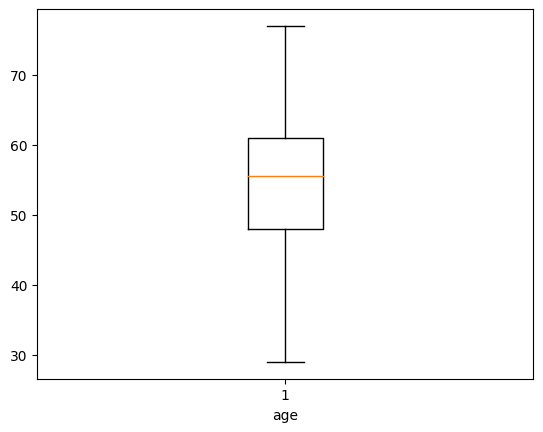

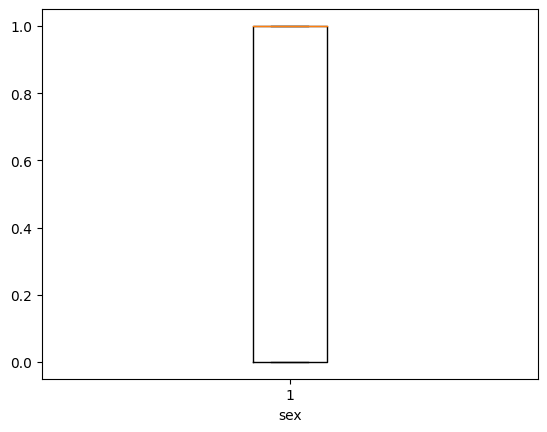

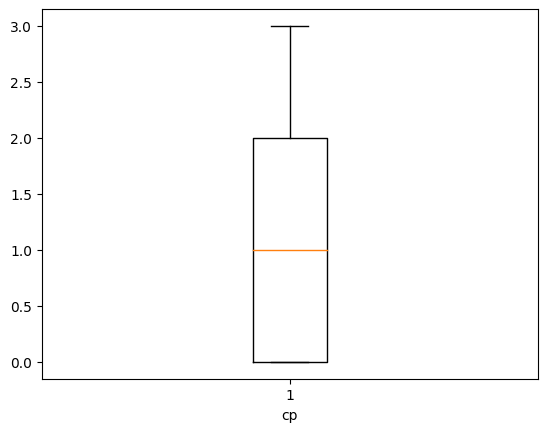

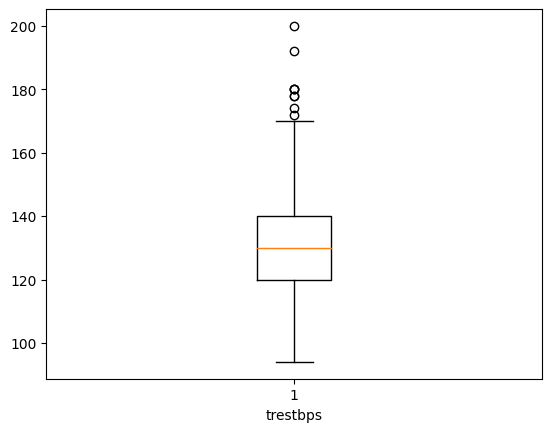

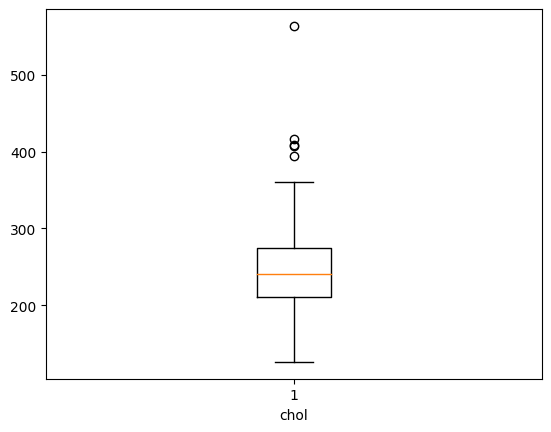

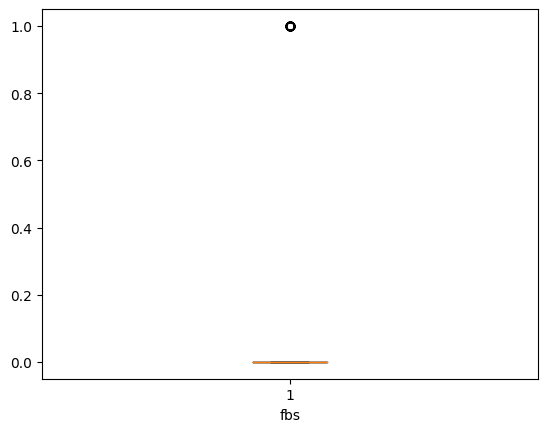

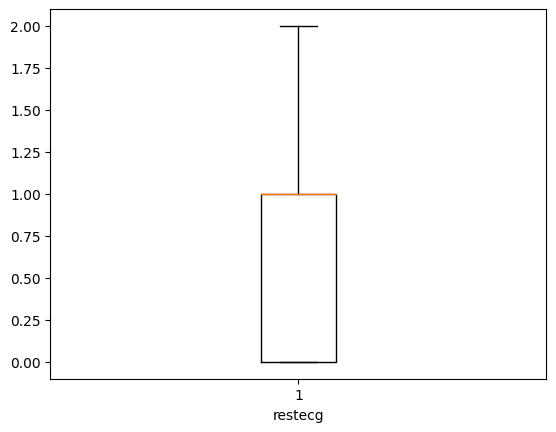

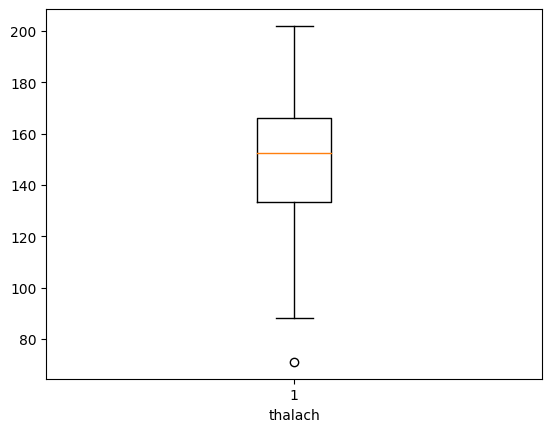

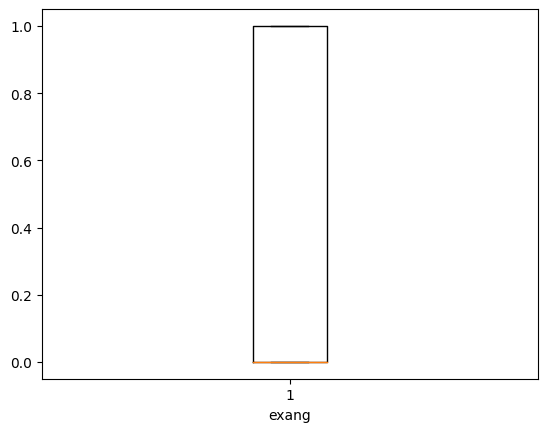

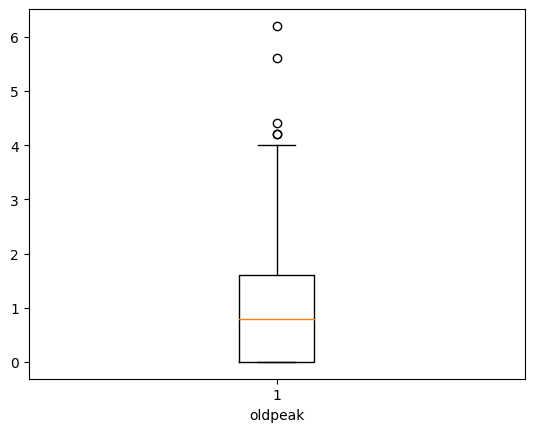

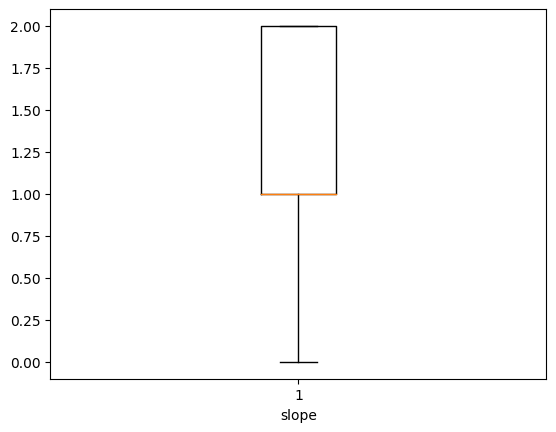

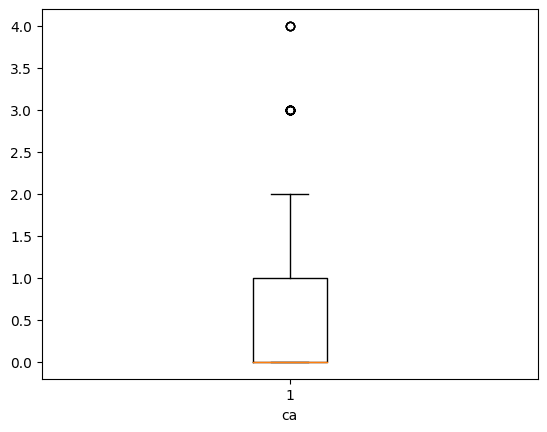

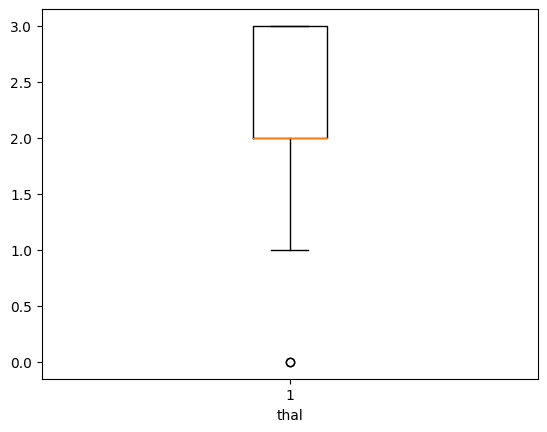

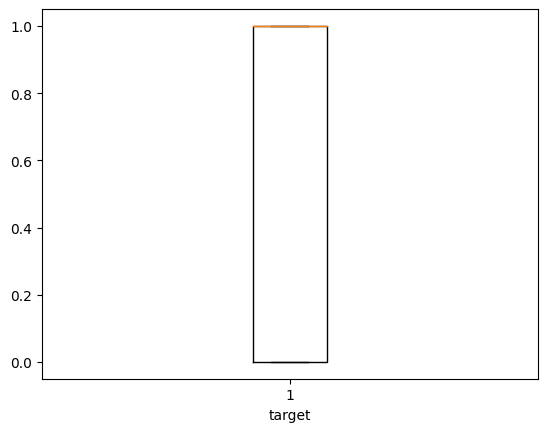

In [ ]:
for i in col:
  if (df[i].dtypes == 'int64' or df[i].dtypes == 'float64'):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [ ]:
# As the tree algorithm doesn't get impacted by outliers you can skip the process of
# outlier removal

<Axes: >

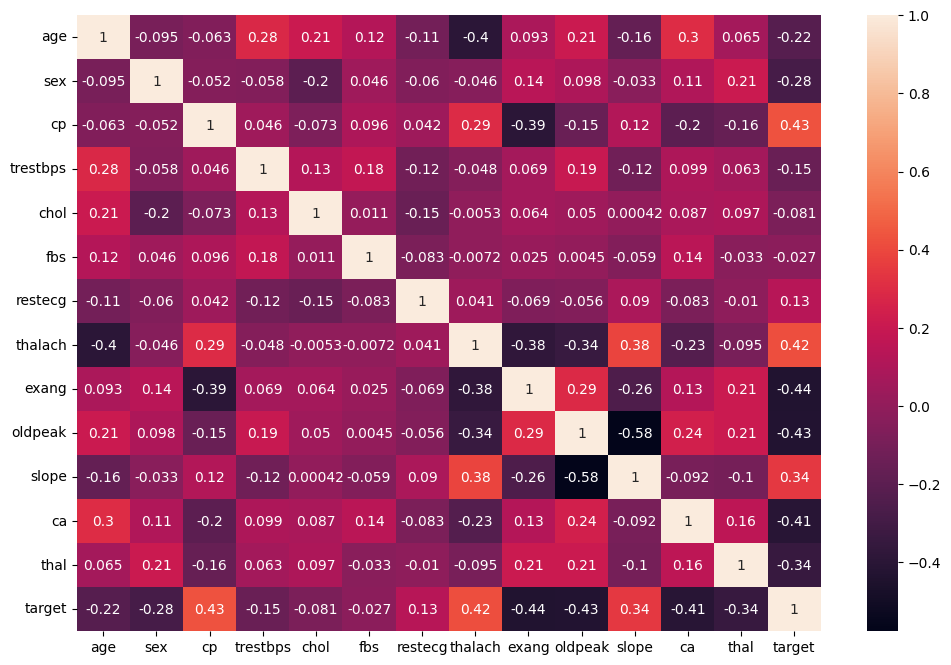

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True)

In [ ]:
# model building

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# divide the data into independent and dependent variables

x = df.drop(columns = 'target')
y = df['target']

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=60)

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
# train the model

model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# test the model

y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
# check the accuracy score

accuracy_score(y_pred,y_test)

0.819672131147541

In [ ]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[20,  7],
       [ 4, 30]])

In [ ]:
# hyperparamters tuning

# it is the process of finding the best combination of hyperparamters to optimize a model's
# performace on a specific task

In [ ]:
# difference b/w parameters and hyperparamters
# coeff in linear regerssion - parameters - learned from the data during training
# hyperparameters - set before training begins and control aspects like model architecture
# or optimization learning rate , tree depth

In [ ]:
# hyperparameter tuning methods - grid search cv
# a brute force method where we define a search space of hyperparameters and
# train the model on every combination

In [ ]:
# # # random search cv -  it will randomly sample combination of hyperparameters from a
# # defined search space

# it is efficient but the coverage is less

In [ ]:
depths = [1,2,3,4,5,6,7,8,9,10,11,12,13]

for i in depths:
    model =DecisionTreeClassifier(max_depth=i,random_state = 60)
    model.fit(x_train,y_train)
    y_pred =model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print("Max depth:",i,"Accuracy score of:",acc)

Max depth: 1 Accuracy score of: 0.7868852459016393
Max depth: 2 Accuracy score of: 0.7540983606557377
Max depth: 3 Accuracy score of: 0.8852459016393442
Max depth: 4 Accuracy score of: 0.8032786885245902
Max depth: 5 Accuracy score of: 0.8688524590163934
Max depth: 6 Accuracy score of: 0.8524590163934426
Max depth: 7 Accuracy score of: 0.8688524590163934
Max depth: 8 Accuracy score of: 0.8852459016393442
Max depth: 9 Accuracy score of: 0.8852459016393442
Max depth: 10 Accuracy score of: 0.8852459016393442
Max depth: 11 Accuracy score of: 0.8852459016393442
Max depth: 12 Accuracy score of: 0.8852459016393442
Max depth: 13 Accuracy score of: 0.8852459016393442


In [ ]:
model.get_depth()  # to get the optimal max_depth of your model

9

In [ ]:
from sklearn.model_selection import GridSearchCV , KFold


In [ ]:
new_model = DecisionTreeClassifier()

In [ ]:
# grid_params = {"criterion":["gini","entropy"],"max_depth":[1,5,50,100],'random_state':[0,1,2,3,4,5]
#                ,'min_sample_split':[2,6,8,3,5,22],'min_sample_leaf':[1,4,6,7,9]}

# # criterion - decides how to split the tree
# # max_depth - how deep the tree can go
# # min_sample_split - min data points needed to split a node
# # min_sample_leaf - min data points required in a leaf

In [ ]:
grid_params = {"criterion":["gini","entropy"],
              "max_depth":[1,5,50,100],
              'random_state':[0,1,2,3,4,5],
              'min_samples_split':[2,6,8,3,5,22], # Removed 0 from min_samples_split
              'min_samples_leaf':[1,4,6,7,9]}

gv = GridSearchCV(estimator = new_model, param_grid = grid_params, cv = 3 )
gv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 50, 100],
                         'min_samples_leaf': [1, 4, 6, 7, 9],
                         'min_samples_split': [2, 6, 8, 3, 5, 22],
                         'random_state': [0, 1, 2, 3, 4, 5]})

In [ ]:
tree_model = gv.best_params

In [ ]:
dt_model = gv.best_estimator_

In [ ]:
y_pred1 = dt_model.predict(xtest)

In [ ]:
tree_params = gv.best_params_   # return best parameters for your model that can give best accuracy

print(tree_params)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 1}


In [ ]:
dt_model = gv.best_estimator_  # creating a model with the best parameters

In [ ]:
y_pred_1 = dt_model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_1)

0.9016393442622951

In [ ]:
# grid_params = {"criterion":["gini","entropy"],
#               "max_depth":[1,5,50,100],
#               'random_state':[0,1,2,3,4,5],
#               'min_samples_split':[2,6,8,3,5,22], # Removed 0 from min_samples_split
#               'min_samples_leaf':[1,4,6,7,9]}

# kf = KFold(n_splits = 5 , shuffle = True , random_state = 42)

# gv = GridSearchCV(estimator = new_model, param_grid = grid_params, cv = kf)
# gv.fit(x_train,y_train)

In [ ]:
# k-1 - train
# 1 - test

# get repeted k times

In [ ]:
from sklearn.tree import plot_tree # Import plot_tree from the sklearn.tree submodule

[Text(0.575, 0.9166666666666666, 'x[2] <= 0.5\ngini = 0.499\nsamples = 241\nvalue = [114, 127]'),
 Text(0.30714285714285716, 0.75, 'x[11] <= 0.5\ngini = 0.388\nsamples = 114\nvalue = [84, 30]'),
 Text(0.44107142857142856, 0.8333333333333333, 'True  '),
 Text(0.21428571428571427, 0.5833333333333334, 'x[12] <= 2.5\ngini = 0.5\nsamples = 53\nvalue = [27, 26]'),
 Text(0.11428571428571428, 0.4166666666666667, 'x[7] <= 146.0\ngini = 0.391\nsamples = 30\nvalue = [8, 22]'),
 Text(0.05714285714285714, 0.25, 'x[8] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.02857142857142857, 0.08333333333333333, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.08571428571428572, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.17142857142857143, 0.25, 'x[0] <= 60.0\ngini = 0.18\nsamples = 20\nvalue = [2, 18]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.444\nsamples = 6\nvalu

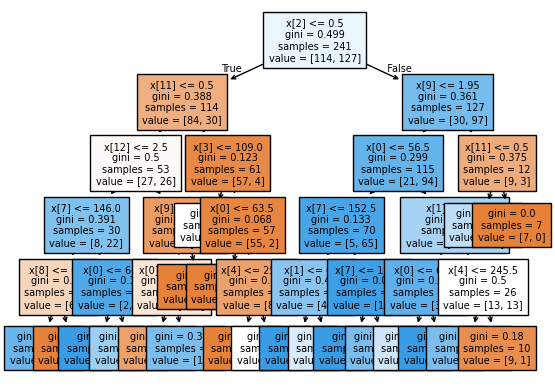

In [ ]:
tree.plot_tree(dt_model,fontsize = 7, filled=True)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = load_iris()

In [ ]:
X,y = data.data , data.target

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=60)

In [ ]:
model = RandomForestClassifier(random_state = 42)

In [ ]:
train_sizes,train_scores,test_scores = learning_curve(model , x_train,y_train,cv = 5, n_jobs = -1)

In [ ]:
train_sizes

array([ 9, 31, 52, 74, 96])

In [ ]:
train_scores

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
test_scores

array([[0.66666667, 0.95833333, 1.        , 1.        , 0.91666667],
       [0.875     , 0.91666667, 1.        , 1.        , 0.95833333],
       [0.875     , 0.95833333, 1.        , 0.95833333, 0.95833333],
       [0.95833333, 0.95833333, 1.        , 0.95833333, 0.95833333],
       [0.95833333, 0.95833333, 1.        , 0.95833333, 0.95833333]])

In [ ]:
training_score_mean = np.mean(train_scores,axis = 1)
test_scores_mean = np.mean(test_scores , axis = 1)

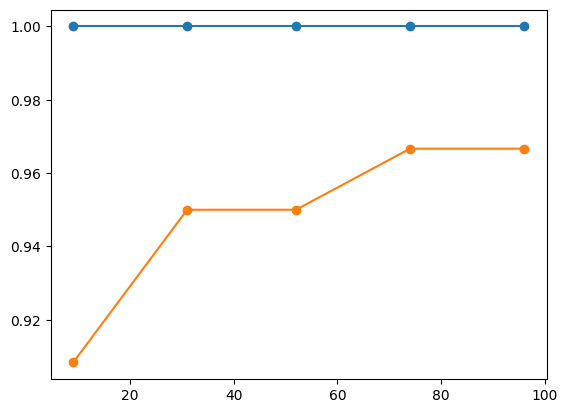

In [ ]:
plt.plot(train_sizes,training_score_mean,label = 'Training score',marker = 'o')
plt.plot(train_sizes,test_scores_mean,label = 'Validation score',marker = 'o')
